In [1]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SP_url = "Resources/S&P500.csv"
tweet_url = "TweetSentiment.csv"

In [3]:
SP_df = pd.read_csv(SP_url)
Tweet_df = pd.read_csv(tweet_url)
# SP_df.head()
# Tweet_df.head()

In [4]:
Tweet_df['tweetdate'] = pd.to_datetime(Tweet_df['tweetdate'])

In [5]:
SP_df['Date'] = pd.to_datetime(SP_df['Date'])

In [6]:
merged_df = pd.merge(SP_df, Tweet_df, how='inner', left_on='Date', right_on='tweetdate')
merged_df.dropna()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change,tweetdate,compound,neg,neu,pos
1,1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000,Negative,-62.140136,-2.475673,84.050048,2019-01-03,0.307300,0.051000,0.788333,0.160778
2,2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000,Positive,84.050048,3.433571,17.750000,2019-01-04,0.431943,0.033571,0.783000,0.183429
3,3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,Positive,17.750000,0.701043,24.719971,2019-01-07,-0.290933,0.150833,0.731667,0.117500
4,4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,Positive,24.719971,0.969529,10.550049,2019-01-08,0.764440,0.054200,0.646600,0.299000
5,5,2019-01-09,2580.000000,2595.320068,2568.889893,2584.959961,2584.959961,4052480000,Positive,10.550049,0.409805,11.679932,2019-01-09,0.191057,0.038143,0.812857,0.149000
6,6,2019-01-10,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000,Positive,11.679932,0.451842,-0.379883,2019-01-10,0.021718,0.118471,0.723529,0.157882
7,7,2019-01-11,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000,Positive,-0.379883,-0.014630,-13.649903,2019-01-11,0.112986,0.074214,0.780357,0.145429
8,8,2019-01-14,2580.310059,2589.320068,2570.409912,2582.610107,2582.610107,3664450000,Positive,-13.649903,-0.525753,27.689942,2019-01-14,0.160412,0.086280,0.795160,0.118600
9,9,2019-01-15,2585.100098,2613.080078,2585.100098,2610.300049,2610.300049,3572330000,Positive,27.689942,1.072169,5.800049,2019-01-15,0.066384,0.097947,0.760474,0.141474
10,10,2019-01-16,2614.750000,2625.760010,2612.679932,2616.100098,2616.100098,3863770000,Positive,5.800049,0.222199,19.859863,2019-01-16,-0.353300,0.154000,0.739500,0.106500


In [7]:
df = merged_df[['neg', 'neu', 'pos', 'P/N']]
df.head()

,neg,neu,pos,P/N
0,0.053667,0.755333,0.191000,Positive
1,0.051000,0.788333,0.160778,Negative
2,0.033571,0.783000,0.183429,Positive
3,0.150833,0.731667,0.117500,Positive
4,0.054200,0.646600,0.299000,Positive


In [8]:
from sklearn.preprocessing import LabelEncoder
# One Hot encoding
# Step 0: Reformat data
data = df.values
X = data[:, 0:3]
y = data[:, 3]

# # Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [9]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)

Using TensorFlow backend.


In [10]:
from sklearn.model_selection import train_test_split
# splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y)

In [11]:
clf = RandomForestClassifier(random_state=100)

In [12]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  52.38095238095239


In [14]:
model.score(X_train, y_train)

0.9523809523809523

In [15]:
importances = model.feature_importances_
importances

array([0.35739203, 0.30440491, 0.33820305])

In [16]:
sorted(zip(model.feature_importances_, df['P/N']), reverse=True)

[(0.35739203426479754, 'Positive'),
 (0.3382030512035396, 'Positive'),
 (0.30440491453166296, 'Negative ')]

In [17]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.41      0.43      0.42        21
           1       0.69      0.57      0.62        42

   micro avg       0.58      0.52      0.55        63
   macro avg       0.55      0.50      0.52        63
weighted avg       0.59      0.52      0.56        63
 samples avg       0.52      0.52      0.52        63



C:\Users\David\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [18]:
merged_df = merged_df.rename(columns={'Daily_%_Change': 'Perc_Change'})

In [19]:
merged_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Perc_Change,Future_Change,tweetdate,compound,neg,neu,pos
0,0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,Positive,NaN,NaN,-62.140136,2019-01-02,0.332267,0.053667,0.755333,0.191000
1,1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000,Negative,-62.140136,-2.475673,84.050048,2019-01-03,0.307300,0.051000,0.788333,0.160778
2,2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000,Positive,84.050048,3.433571,17.750000,2019-01-04,0.431943,0.033571,0.783000,0.183429
3,3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,Positive,17.750000,0.701043,24.719971,2019-01-07,-0.290933,0.150833,0.731667,0.117500
4,4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,Positive,24.719971,0.969529,10.550049,2019-01-08,0.764440,0.054200,0.646600,0.299000


In [28]:
Ser = pd.Series(model.predict(X).ravel())

In [29]:
merged_df['strategy_returns'] = merged_df.Perc_Change.shift(-1)* Ser

In [30]:
merged_df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Perc_Change,Future_Change,tweetdate,compound,neg,neu,pos,strategy_returns
0,0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,Positive,NaN,NaN,-62.140136,2019-01-02,0.332267,0.053667,0.755333,0.191000,-0.000000
1,1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000,Negative,-62.140136,-2.475673,84.050048,2019-01-03,0.307300,0.051000,0.788333,0.160778,3.433571
2,2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000,Positive,84.050048,3.433571,17.750000,2019-01-04,0.431943,0.033571,0.783000,0.183429,0.701043
3,3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,Positive,17.750000,0.701043,24.719971,2019-01-07,-0.290933,0.150833,0.731667,0.117500,0.000000
4,4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,Positive,24.719971,0.969529,10.550049,2019-01-08,0.764440,0.054200,0.646600,0.299000,0.000000
5,5,2019-01-09,2580.000000,2595.320068,2568.889893,2584.959961,2584.959961,4052480000,Positive,10.550049,0.409805,11.679932,2019-01-09,0.191057,0.038143,0.812857,0.149000,0.451842
6,6,2019-01-10,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3704500000,Positive,11.679932,0.451842,-0.379883,2019-01-10,0.021718,0.118471,0.723529,0.157882,-0.000000
7,7,2019-01-11,2588.110107,2596.270020,2577.399902,2596.260010,2596.260010,3434490000,Positive,-0.379883,-0.014630,-13.649903,2019-01-11,0.112986,0.074214,0.780357,0.145429,-0.525753
8,8,2019-01-14,2580.310059,2589.320068,2570.409912,2582.610107,2582.610107,3664450000,Positive,-13.649903,-0.525753,27.689942,2019-01-14,0.160412,0.086280,0.795160,0.118600,0.000000
9,9,2019-01-15,2585.100098,2613.080078,2585.100098,2610.300049,2610.300049,3572330000,Positive,27.689942,1.072169,5.800049,2019-01-15,0.066384,0.097947,0.760474,0.141474,0.222199


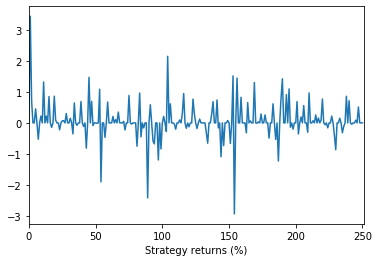

In [32]:
merged_df.strategy_returns.plot()
plt.xlabel('Strategy returns (%)')
plt.show()

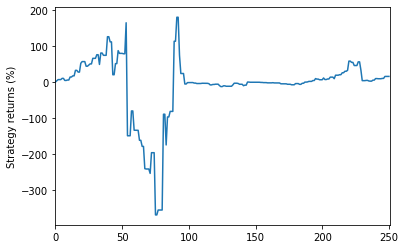

In [34]:
(merged_df.strategy_returns+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()